In [70]:
import os
from glob import glob
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import plotting_extent
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import gdal
from rasterio.merge import merge
from rasterio.plot import show

In [65]:
dir = r"C:\\Users\\acer\\Desktop\\New folder"
outdir = r'C:\\Users\\acer\\Desktop\\coor\\BGD_\\Original\\composite'
search_criteria = "*.tif"
q = os.path.join(dir, search_criteria)
bd_2013 = glob(q)

In [66]:
bd_2013.sort()
bd_2013

['C:\\\\Users\\\\acer\\\\Desktop\\\\New folder\\2013_modified.tif',
 'C:\\\\Users\\\\acer\\\\Desktop\\\\New folder\\F182013.v4c_web.stable_lights.avg_vis.tif']

In [68]:
src_mosaic_2013 = []
for fp in bd_2013:
     src_2013 = rasterio.open(fp)
     src_mosaic_2013.append(src_2013)

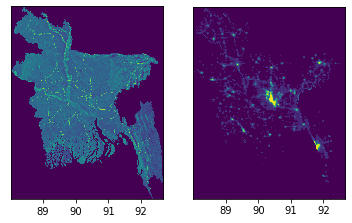

In [69]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(6, 4))

# Plot 2013 files
show(src_mosaic_2013[0], ax=ax1)
show(src_mosaic_2013[1], ax=ax2)

# Do not show y-ticks values in axis
for ax in [ax1, ax2]:
    ax.yaxis.set_visible(False)

In [71]:
src_mosaic_2013

[<open DatasetReader name='C:\\Users\\acer\\Desktop\\New folder\2013_modified.tif' mode='r'>,
 <open DatasetReader name='C:\\Users\\acer\\Desktop\\New folder\F182013.v4c_web.stable_lights.avg_vis.tif' mode='r'>]

In [84]:
mosaic_2013, out_trans = merge(src_mosaic_2013)


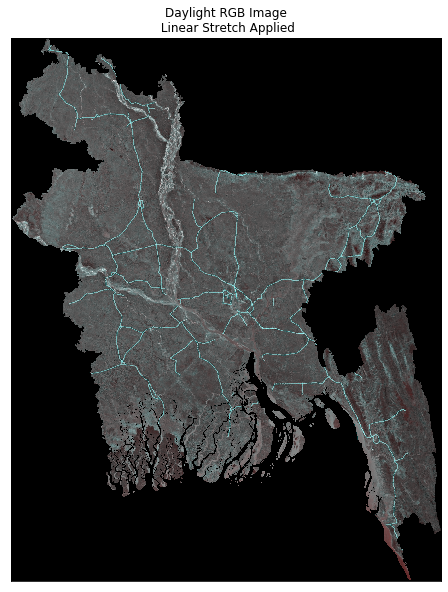

In [89]:
ep.plot_rgb(mosaic_2013,
            rgb=[2, 0, 0],
            title="Daylight RGB Image\n Linear Stretch Applied",
            stretch=True,
            str_clip=0,)
plt.show()

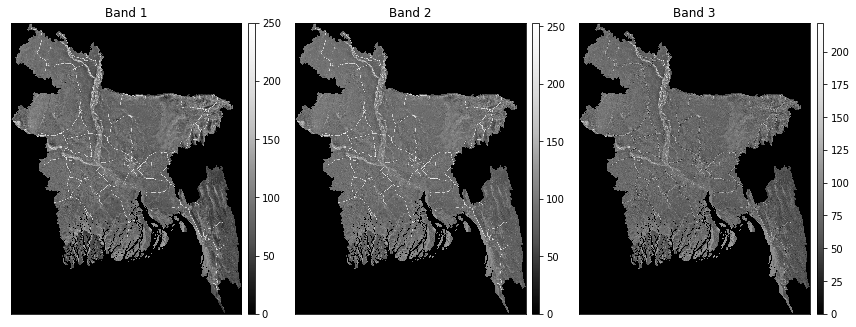

In [90]:
ep.plot_bands(mosaic_2013)
plt.show()

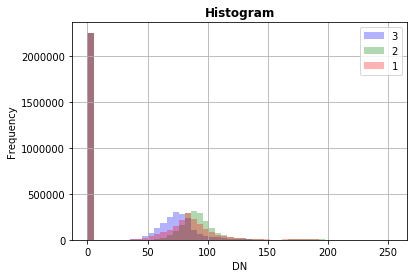

In [92]:
from rasterio.plot import show_hist

show_hist(mosaic_2013, bins=50, lw=0.0, stacked=False, alpha=0.3,
      histtype='stepfilled', title="Histogram")